# Post Grad Income Data by State: 
## Investigating whether or not different properties of colleges change based on location of the school
### Morgan Sizemore & Abby Zweifach

### Importing the data

In [80]:
import pandas as pd
import numpy as np
import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff



In [81]:
college_income_stats = pd.read_csv('Most-Recent-Cohorts-All-Data-Elements.csv') 
college_income_stats.head()

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning:

Columns (6,9,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1008,1009,1010,1011,1014,1015,1016,1017,1018,1019,1021,1022,1023,1027,1028,1029,1030,1031,1032,1034,1035,1036,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1065,1066,1067,1068,1069,1070,1071,1073,1074,1075,1076,1078,1079,1080,1081,1082,1083,1084,1086,1087,1088,1089,1091,1092,1093,1094,1095,1096,1097,1099,1100,1101,1102,1104,1105,1106,1107,1108,1109,1110,1112,1113,1114,1115,1118,1119,1121,1122,1123,1125,1127,1128,1131,1132,1134,1135,1136,1138,1140,1141,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1170,1171,1172,1173,1174,1175,1177,1178,1179,1180,1183,1184,1185,1186,1187,1188,1190,1192,1196,1199,1200,1201,1209,1212,1213,1214,1222,1223,1224,1225

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP6_FTNFT_POOLED_SUPP,OMAWDP8_FTNFT_POOLED_SUPP,OMENRYP8_FTNFT_POOLED_SUPP,OMENRAP8_FTNFT_POOLED_SUPP,OMENRUP8_FTNFT_POOLED_SUPP,OMAWDP6_PTNFT_POOLED_SUPP,OMAWDP8_PTNFT_POOLED_SUPP,OMENRYP8_PTNFT_POOLED_SUPP,OMENRAP8_PTNFT_POOLED_SUPP,OMENRUP8_PTNFT_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,...,0.4694,0.5136,0.0034,0.1429,0.3401,0.3333,0.3333,0,0,0.6667
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,0.6117,0.624,0.0075,0.2166,0.1519,0.3642,0.4,0.0434,0.2755,0.2811
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.5503,0.5562,0.0059,0.4379,0,0.4429,0.4714,0.0429,0.4857,0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.5456,0.5651,0.0123,0.2841,0.1385,0.3378,0.3547,0.0236,0.4257,0.1959
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.4105,0.429,0.0062,0.216,0.3488,0.2931,0.3103,0.0345,0.3966,0.2586


### Cleaning the data

In [82]:
college_income_stats.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'OMAWDP6_FTNFT_POOLED_SUPP', 'OMAWDP8_FTNFT_POOLED_SUPP',
       'OMENRYP8_FTNFT_POOLED_SUPP', 'OMENRAP8_FTNFT_POOLED_SUPP',
       'OMENRUP8_FTNFT_POOLED_SUPP', 'OMAWDP6_PTNFT_POOLED_SUPP',
       'OMAWDP8_PTNFT_POOLED_SUPP', 'OMENRYP8_PTNFT_POOLED_SUPP',
       'OMENRAP8_PTNFT_POOLED_SUPP', 'OMENRUP8_PTNFT_POOLED_SUPP'],
      dtype='object', length=1899)

In [83]:
#Chose to only look at income information 10 years after graduation. 
x = ['UNITID','INSTNM','STABBR','ZIP','LATITUDE','LONGITUDE','PCT_WHITE','PCT_BLACK','PCT_ASIAN','PCT_HISPANIC','MN_EARN_WNE_P10','MD_EARN_WNE_P10']
college_income_stats[x]
clean_data = college_income_stats[x].set_index(['UNITID','INSTNM'])
clean_data2 = clean_data.fillna(0)
clean_data2.head()

,,STABBR,ZIP,LATITUDE,LONGITUDE,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,MN_EARN_WNE_P10,MD_EARN_WNE_P10
UNITID,INSTNM,,,,,,,,,,
100654,Alabama A & M University,AL,35762,34.783368,-86.568502,46.84000015,47.97999954,1.480000019,3.789999962,35500,31000
100663,University of Alabama at Birmingham,AL,35294-0110,33.505697,-86.799345,69.01999664,27.76000023,1.100000024,2.029999971,48400,41200
100690,Amridge University,AL,36117-3553,32.362609,-86.174010,70.87999725,22.53000069,1.289999962,6.940000057,47600,39600
100706,University of Alabama in Huntsville,AL,35899,34.724557,-86.640449,76.37999725,18.97999954,1.419999957,2.549999952,52000,46700
100724,Alabama State University,AL,36104-0271,32.364317,-86.295677,42.68999863,52.31999969,1.409999967,4.090000153,30600,27700


### Descriptive statistics

In [84]:
#First, we converted the data into numeric data
numeric_data = clean_data2[['PCT_WHITE','PCT_BLACK','PCT_ASIAN','PCT_HISPANIC','MN_EARN_WNE_P10','MD_EARN_WNE_P10']] = clean_data2[['PCT_WHITE','PCT_BLACK','PCT_ASIAN','PCT_HISPANIC','MN_EARN_WNE_P10','MD_EARN_WNE_P10']].apply(pd.to_numeric, errors='coerce')
numeric_data.head()

,,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,MN_EARN_WNE_P10,MD_EARN_WNE_P10
UNITID,INSTNM,,,,,,
100654,Alabama A & M University,46.840000,47.980000,1.48,3.79,35500.0,31000.0
100663,University of Alabama at Birmingham,69.019997,27.760000,1.10,2.03,48400.0,41200.0
100690,Amridge University,70.879997,22.530001,1.29,6.94,47600.0,39600.0
100706,University of Alabama in Huntsville,76.379997,18.980000,1.42,2.55,52000.0,46700.0
100724,Alabama State University,42.689999,52.320000,1.41,4.09,30600.0,27700.0


In [85]:
#Then, we calculated the max, min, mean and median
numeric_data.max()

PCT_WHITE              98.980003
PCT_BLACK              85.820000
PCT_ASIAN              51.720001
PCT_HISPANIC           99.349998
MN_EARN_WNE_P10    250000.000000
MD_EARN_WNE_P10    250000.000000
dtype: float64

In [86]:
numeric_data.min()

PCT_WHITE          0.0
PCT_BLACK          0.0
PCT_ASIAN          0.0
PCT_HISPANIC       0.0
MN_EARN_WNE_P10    0.0
MD_EARN_WNE_P10    0.0
dtype: float64

In [87]:
numeric_data.median()

PCT_WHITE             69.970001
PCT_BLACK              4.820000
PCT_ASIAN              1.040000
PCT_HISPANIC           3.110000
MN_EARN_WNE_P10    33200.000000
MD_EARN_WNE_P10    29500.000000
dtype: float64

In [88]:
numeric_data.mean()

PCT_WHITE             53.946963
PCT_BLACK              9.108320
PCT_ASIAN              2.157790
PCT_HISPANIC           9.334354
MN_EARN_WNE_P10    32792.868265
MD_EARN_WNE_P10    29082.217378
dtype: float64

### Data Visualization

In [89]:
x1 = clean_data2['STABBR']
final_data = numeric_data.copy()
final_data['STATE']= x1.tolist()

final_data.head()


,,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,MN_EARN_WNE_P10,MD_EARN_WNE_P10,STATE
UNITID,INSTNM,,,,,,,
100654,Alabama A & M University,46.840000,47.980000,1.48,3.79,35500.0,31000.0,AL
100663,University of Alabama at Birmingham,69.019997,27.760000,1.10,2.03,48400.0,41200.0,AL
100690,Amridge University,70.879997,22.530001,1.29,6.94,47600.0,39600.0,AL
100706,University of Alabama in Huntsville,76.379997,18.980000,1.42,2.55,52000.0,46700.0,AL
100724,Alabama State University,42.689999,52.320000,1.41,4.09,30600.0,27700.0,AL


In [90]:
by_state=final_data.groupby('STATE').aggregate(np.mean)
by_state.head(10)

,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,MN_EARN_WNE_P10,MD_EARN_WNE_P10
STATE,,,,,,
AK,48.063334,2.558889,3.131111,3.584444,36957.142857,32400.000000
AL,48.060722,22.263402,0.737526,2.149278,31116.666667,27164.444444
AR,55.915506,14.795730,0.600449,2.659438,26929.113924,23531.645570
AS,54.299999,1.070000,21.200001,20.770000,24500.000000,22300.000000
AZ,45.584920,2.703629,1.468387,14.950968,30311.206897,26738.793103
CA,36.385649,4.729643,6.312739,18.863666,31665.912763,27459.127625
CO,51.298772,3.259825,1.466316,10.422368,27464.150943,24167.924528
CT,61.939884,9.446279,2.053837,9.324070,40348.051948,36693.506494
DC,33.791818,31.451363,2.805909,5.865000,41880.952381,36242.857143


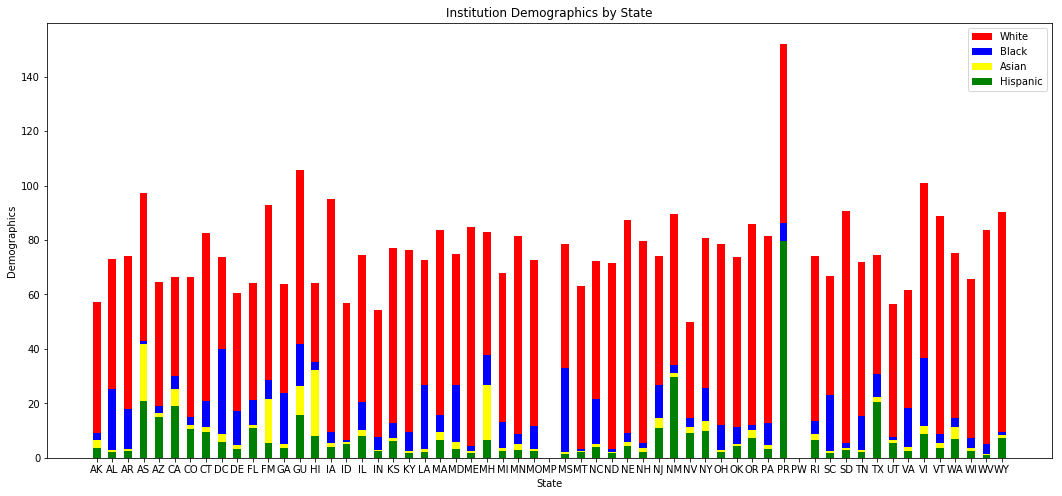

In [91]:
#Stacked bar plot of average state demographic composition
state = by_state.index
White = by_state['PCT_WHITE']
Black = by_state['PCT_BLACK']
Asian = by_state['PCT_ASIAN']
Hispanic = by_state['PCT_HISPANIC']
ind = [x for x, _ in enumerate(state)]
stackedbarplot = plt.figure(figsize=(18,8))
plt.bar(ind, White, width=0.5, label='White', color='Red', bottom=Black+Asian+Hispanic)
plt.bar(ind, Black, width=0.5, label='Black', color='Blue', bottom=Asian+Hispanic)
plt.bar(ind, Asian, width=0.5, label='Asian', color='Yellow', bottom=Hispanic)
plt.bar(ind, Hispanic, width=0.5, label='Hispanic', color='Green')


plt.xticks(ind, state)
plt.ylabel("Demographics")
plt.xlabel("State")
plt.legend(loc="upper right")
plt.title("Institution Demographics by State")
plt.show()

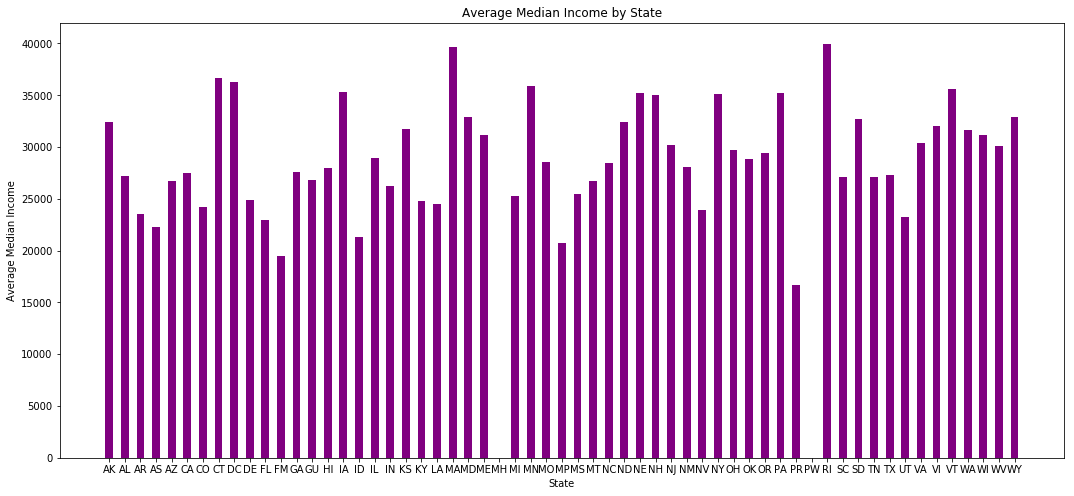

In [92]:
#Bar plot of average median income by state
state = by_state.index
median = by_state['MD_EARN_WNE_P10']

state_pos = [i for i, _ in enumerate(state)]
barplot = plt.figure(figsize=(18,8))
plt.bar(state_pos, median,width=0.5, color='Purple')
plt.xlabel("State")
plt.ylabel("Average Median Income")
plt.title("Average Median Income by State")

plt.xticks(state_pos, state)

plt.show()

In [93]:
#States with 10 highest average median incomes
by_state_sorted = by_state.sort_values(['MD_EARN_WNE_P10'], ascending=False)
by_state_sorted.head(10)

,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,MN_EARN_WNE_P10,MD_EARN_WNE_P10
STATE,,,,,,
RI,60.691154,4.623462,2.238846,6.477692,44785.714286,39980.952381
MA,67.836906,6.280774,3.077348,6.454420,44357.317073,39658.536585
CT,61.939884,9.446279,2.053837,9.324070,40348.051948,36693.506494
DC,33.791818,31.451363,2.805909,5.865000,41880.952381,36242.857143
MN,72.907846,3.595692,2.021462,2.949538,39575.609756,35856.097561
VT,79.775000,3.436923,1.943462,3.518846,40668.000000,35568.000000
IA,85.580455,3.856023,1.419886,4.057500,39155.000000,35296.250000
PA,68.750318,8.236897,1.560451,3.096764,38616.384181,35244.067797
NE,78.364375,3.314167,1.197292,4.487917,39519.565217,35191.304348


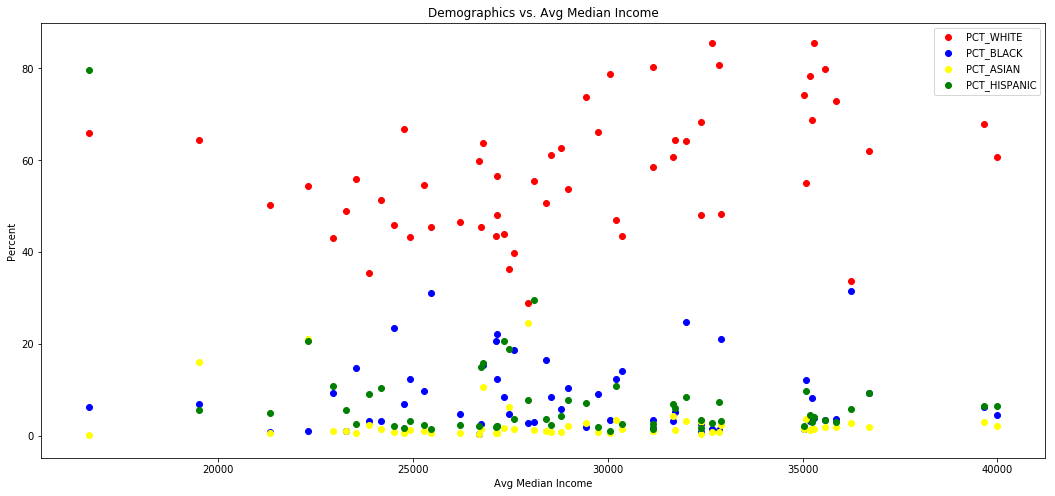

In [94]:
#Examining the relationship between demographic percentages and median income
wpop=by_state['PCT_WHITE']
bpop=by_state['PCT_BLACK']
asianpop=by_state['PCT_ASIAN']
hispanicpop=by_state['PCT_HISPANIC']
x=by_state['MD_EARN_WNE_P10']
plt.figure(figsize=(18,8))
plt.scatter(x, wpop, color='red')
plt.scatter(x, bpop, color='blue')
plt.scatter(x, asianpop,color='yellow')
plt.scatter(x, hispanicpop, color='green')
plt.xlabel('Avg Median Income')
plt.ylabel('Percent')
plt.title('Demographics vs. Avg Median Income')
plt.legend(loc="upper right")
plt.show()

### Comparing top 10 earning states and top 10 in each demographic category

In [95]:
by_state_sorted2= by_state.sort_values(['PCT_WHITE'], ascending=False)
by_state_sorted2.head(10)

,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,MN_EARN_WNE_P10,MD_EARN_WNE_P10
STATE,,,,,,
IA,85.580455,3.856023,1.419886,4.057500,39155.000000,35296.250000
SD,85.452222,1.595185,0.848148,2.931111,36424.000000,32676.000000
WY,80.744546,1.295455,0.810909,7.395454,37709.090909,32863.636364
ME,80.269756,1.703415,1.026098,1.622195,35238.461538,31156.410256
VT,79.775000,3.436923,1.943462,3.518846,40668.000000,35568.000000
WV,78.872368,3.433553,0.573026,0.991184,33606.779661,30055.932203
NE,78.364375,3.314167,1.197292,4.487917,39519.565217,35191.304348
NH,74.246924,1.583077,1.434103,2.277179,39234.375000,35037.500000
OR,73.696250,2.017045,2.867500,7.222500,33407.317073,29435.365854


States that fall in the top 10 for both median income and percent white population include:
MN, VT, IA, NE


In [96]:
by_state_sorted3= by_state.sort_values(['PCT_BLACK'], ascending=False)
by_state_sorted3.head(10)

,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,MN_EARN_WNE_P10,MD_EARN_WNE_P10
STATE,,,,,,
DC,33.791818,31.451363,2.805909,5.865000,41880.952381,36242.857143
MS,45.567377,31.067869,0.551311,1.454918,29462.962963,25462.962963
VI,64.089996,24.840000,3.280000,8.570000,35500.000000,32000.000000
LA,45.908110,23.518346,0.957008,2.269291,28280.733945,24497.247706
AL,48.060722,22.263402,0.737526,2.149278,31116.666667,27164.444444
MD,48.209451,21.035824,2.417253,3.333297,37047.058824,32901.176471
SC,43.533063,20.630540,0.734324,1.867297,30656.435644,27137.623762
GA,39.826854,18.744551,1.442416,3.780843,31300.591716,27595.857988
NC,50.759305,16.516631,1.103583,3.804813,32168.390805,28414.367816


States that fall in the top 10 for both median income and percent black population include: DC

In [97]:
by_state_sorted4= by_state.sort_values(['PCT_ASIAN'], ascending=False)
by_state_sorted4.head(10)

,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,MN_EARN_WNE_P10,MD_EARN_WNE_P10
STATE,,,,,,
HI,28.911667,2.870417,24.556250,7.832917,31304.000000,27960.000000
AS,54.299999,1.070000,21.200001,20.770000,24500.000000,22300.000000
MH,45.099998,11.000000,20.150000,6.650000,NaN,NaN
FM,64.330002,6.870000,16.170000,5.570000,20400.000000,19500.000000
GU,63.855000,15.390000,10.710000,15.800000,29900.000000,26800.000000
CA,36.385649,4.729643,6.312739,18.863666,31665.912763,27459.127625
WA,60.699580,3.234118,4.268992,7.061176,35461.261261,31669.369369
NY,55.063371,12.087011,3.703753,9.807483,39509.610390,35086.753247
NJ,47.089085,12.458170,3.553660,10.891046,34033.093525,30216.546763


States that fall in the top 10 for both median income and percent asian population include: NY

In [98]:
by_state_sorted5= by_state.sort_values(['PCT_HISPANIC'], ascending=False)
by_state_sorted5.head(10)

,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,MN_EARN_WNE_P10,MD_EARN_WNE_P10
STATE,,,,,,
PR,66.041575,6.288219,0.204452,79.625274,19922.656250,16691.406250
NM,55.524000,3.017000,1.358600,29.692000,32725.531915,28095.744681
AS,54.299999,1.070000,21.200001,20.770000,24500.000000,22300.000000
TX,43.879224,8.467295,1.701042,20.562971,31545.047170,27343.867925
CA,36.385649,4.729643,6.312739,18.863666,31665.912763,27459.127625
GU,63.855000,15.390000,10.710000,15.800000,29900.000000,26800.000000
AZ,45.584920,2.703629,1.468387,14.950968,30311.206897,26738.793103
NJ,47.089085,12.458170,3.553660,10.891046,34033.093525,30216.546763
FL,43.027119,9.454334,1.068063,10.822131,25918.598383,22940.431267


States that fall in the top 10 for both median income and percent asian population include: N/A

In [115]:
map_data = numeric_data.copy()
map_data['LATITUDE']=clean_data2['LATITUDE']
map_data['LONGITUDE']=clean_data2['LONGITUDE']
map_data['STATE']=clean_data2['STABBR']
map_data.head()

,,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,MN_EARN_WNE_P10,MD_EARN_WNE_P10,LATITUDE,LONGITUDE,STATE
UNITID,INSTNM,,,,,,,,,
100654,Alabama A & M University,46.840000,47.980000,1.48,3.79,35500.0,31000.0,34.783367999999996,-86.568502,AL
100663,University of Alabama at Birmingham,69.019997,27.760000,1.10,2.03,48400.0,41200.0,33.505697,-86.799345,AL
100690,Amridge University,70.879997,22.530001,1.29,6.94,47600.0,39600.0,32.362609,-86.17401,AL
100706,University of Alabama in Huntsville,76.379997,18.980000,1.42,2.55,52000.0,46700.0,34.724557,-86.640449,AL
100724,Alabama State University,42.689999,52.320000,1.41,4.09,30600.0,27700.0,32.364317,-86.295677,AL
